In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [2]:
import os

os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")

In [3]:
from langchain_groq import ChatGroq

model = ChatGroq(model="qwen/qwen3-32b")

In [4]:
class jokeState(TypedDict):

  topic: str
  joke: str
  explanation: str

In [7]:

def generate_joke(state: jokeState):

  prompt = f'generate a joke on the topic {state["topic"]}'

  response = model.invoke(prompt)

  return {'joke': response}

In [8]:
def generate_explanation(state: jokeState):

  prompt = f'explain the joke {state["joke"]}'

  response = model.invoke(prompt)

  return {'explanation': response}

In [11]:
from langgraph.constants import START
graph = StateGraph(jokeState)

graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation',generate_explanation)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation',END)

checkpointer = InMemorySaver()

workflow = graph.compile(checkpointer=checkpointer)



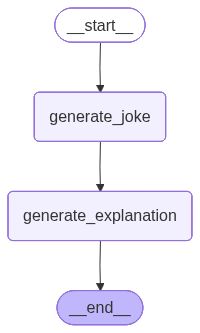

In [12]:
workflow

In [16]:
config1 = {"configurable": {"thread_id":"1"}}

initial_state={
  'topic': 'Uefa champions league'
}

final_state = workflow.invoke(initial_state,config=config1)

In [17]:
final_state

{'topic': 'Uefa champions league',
 'joke': AIMessage(content='<think>\nOkay, I need to come up with a joke about the UEFA Champions League. Let me start by recalling what the Champions League is all about. It\'s a prestigious football competition among top European clubs. So, the joke should relate to elements like teams, matches, famous players, or maybe the structure of the tournament.\n\nFirst, think about common joke structures. Maybe a play on words with team names or the term "champions." For example, "Why did the [something] join the Champions League? To become the [punchline]." Or maybe something about the intensity of the matches.\n\nAnother angle could be the famous anthem or the famous venues. Or maybe the fact that it\'s a dream for players and teams to participate. Also, there\'s the aspect of underdogs versus favorites. Maybe a joke about a team that\'s not expected to win but makes it far.\n\nLet me think about puns. "Champions League" could be paired with "champion" in

In [15]:
config2 = {"configurable": {"thread_id":"2"}}

workflow.invoke({'topic':'Biriyani'},config=config2)

{'topic': 'Biriyani',
 'joke': AIMessage(content='<think>\nOkay, I need to come up with a joke about biryani. Let\'s start by thinking about what biryani is. It\'s a popular Indian dish made with basmati rice, meat, or vegetables, and spices. People really love it, so maybe I can play on that.\n\nHmm, maybe a play on words with the ingredients. Let\'s see... "What do you call a detective who loves biryani?" No, maybe not detective. Maybe something else. Oh, "layered" is a key part of biryani. Each layer of rice and meat. So maybe something about layers.\n\nHow about a pun on "layered" and another word. Maybe "mystery"? Like, "What do you call a layered mystery that\'s also a dish?" But that\'s a bit forced. Let me think again.\n\nAnother angle: people often say biryani is worth fighting over. There\'s a famous quote attributed to someone about biryani and a fight. Maybe use that. Like, "Why did the chicken cross the road? To get to the biryani!" No, not quite.\n\nOr maybe a joke about 

In [18]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'Uefa champions league', 'joke': AIMessage(content='<think>\nOkay, I need to come up with a joke about the UEFA Champions League. Let me start by recalling what the Champions League is all about. It\'s a prestigious football competition among top European clubs. So, the joke should relate to elements like teams, matches, famous players, or maybe the structure of the tournament.\n\nFirst, think about common joke structures. Maybe a play on words with team names or the term "champions." For example, "Why did the [something] join the Champions League? To become the [punchline]." Or maybe something about the intensity of the matches.\n\nAnother angle could be the famous anthem or the famous venues. Or maybe the fact that it\'s a dream for players and teams to participate. Also, there\'s the aspect of underdogs versus favorites. Maybe a joke about a team that\'s not expected to win but makes it far.\n\nLet me think about puns. "Champions League" could be paire

In [19]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'Uefa champions league', 'joke': AIMessage(content='<think>\nOkay, I need to come up with a joke about the UEFA Champions League. Let me start by recalling what the Champions League is all about. It\'s a prestigious football competition among top European clubs. So, the joke should relate to elements like teams, matches, famous players, or maybe the structure of the tournament.\n\nFirst, think about common joke structures. Maybe a play on words with team names or the term "champions." For example, "Why did the [something] join the Champions League? To become the [punchline]." Or maybe something about the intensity of the matches.\n\nAnother angle could be the famous anthem or the famous venues. Or maybe the fact that it\'s a dream for players and teams to participate. Also, there\'s the aspect of underdogs versus favorites. Maybe a joke about a team that\'s not expected to win but makes it far.\n\nLet me think about puns. "Champions League" could be pair

In [20]:
workflow.invoke(None, {"configurable": {"thread_id": "1","checkpoint_id":"1f10c83d-d329-62d5-bfff-5684321bd5b6"}})

{'topic': 'Football',
 'joke': AIMessage(content='<think>\nOkay, I need to come up with a football joke. Let me think about football topics. Maybe something about the players, the game itself, or common situations in football.\n\nHmm, players often trip or make funny mistakes. Maybe a pun with the word "touchdown" or "goalpost". Or maybe something about the coach\'s strategies. Let me brainstorm.\n\nWhat about a joke involving a play on words? Like a quarterback and a math teacher? Or maybe a football getting lost? Wait, here\'s an idea: Why did the football player bring a ladder to the game? So he could reach the goal posts. But that\'s a bit simple. Maybe something more involved.\n\nAnother angle: teamwork. Like passing the ball. Maybe something about teamwork and a joke about not passing the buck. Or maybe a pun on "block" as in blocking in football and a block of wood. Let me try that.\n\nHere\'s a thought: Why don\'t football players ever get cold? Because they always wear helmets